Best DT Params: {'criterion': 'entropy', 'max_depth': 7}
Decision Tree -> Accuracy: 0.9123, F1 Score: 0.9275
              precision    recall  f1-score   support

           0       0.83      0.95      0.89        42
           1       0.97      0.89      0.93        72

    accuracy                           0.91       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



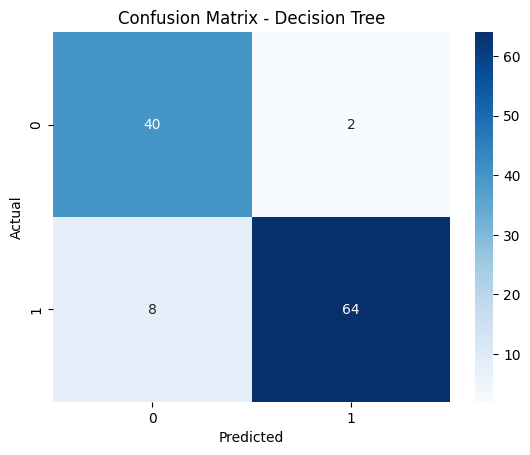

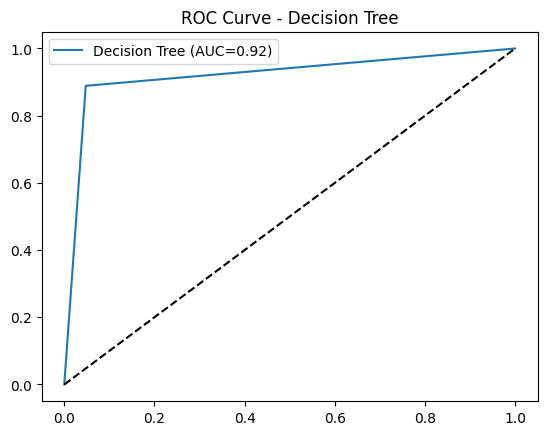

Best Ada Params: {'learning_rate': 1, 'n_estimators': 100}
AdaBoost -> Accuracy: 0.9561, F1 Score: 0.9660
              precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



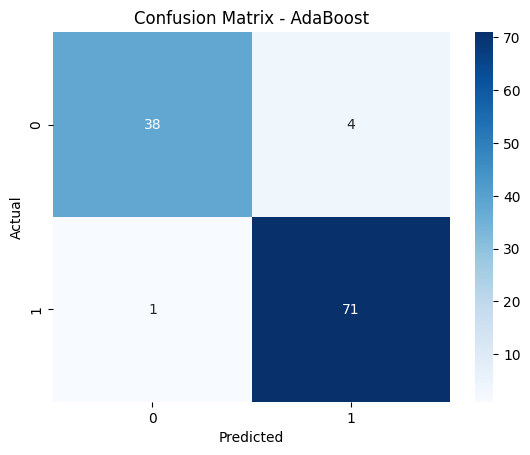

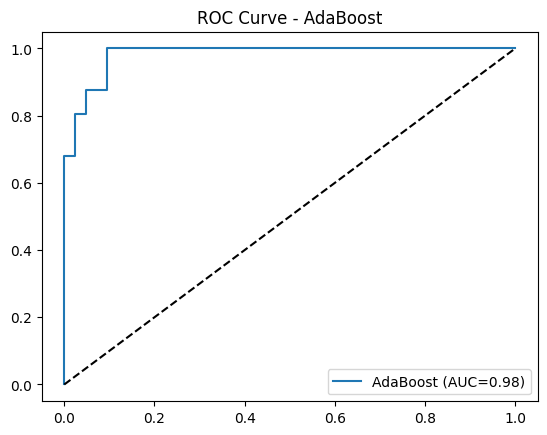

Best GB Params: {'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 50}
Gradient Boosting -> Accuracy: 0.9561, F1 Score: 0.9660
              precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



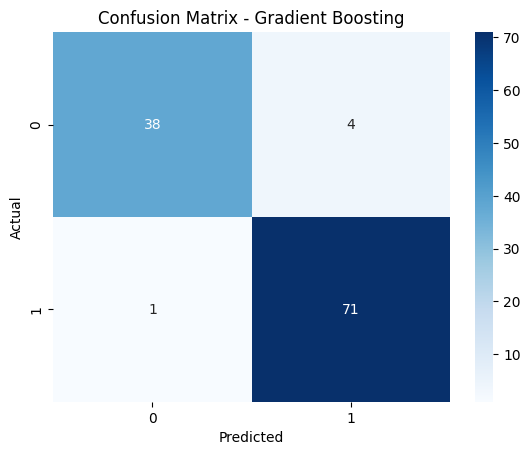

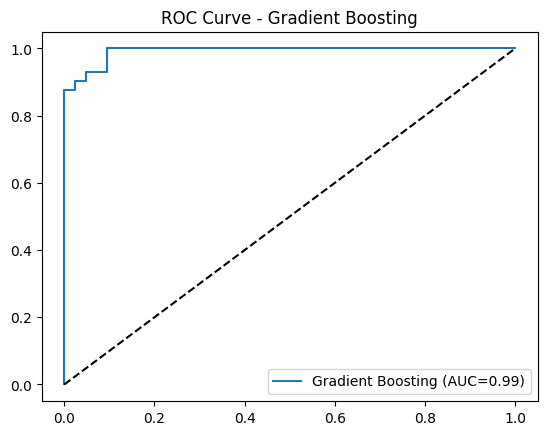

Best XGB Params: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
XGBoost -> Accuracy: 0.9474, F1 Score: 0.9589
              precision    recall  f1-score   support

           0       0.95      0.90      0.93        42
           1       0.95      0.97      0.96        72

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



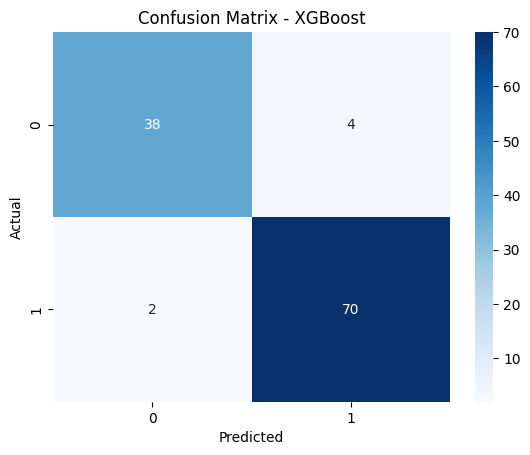

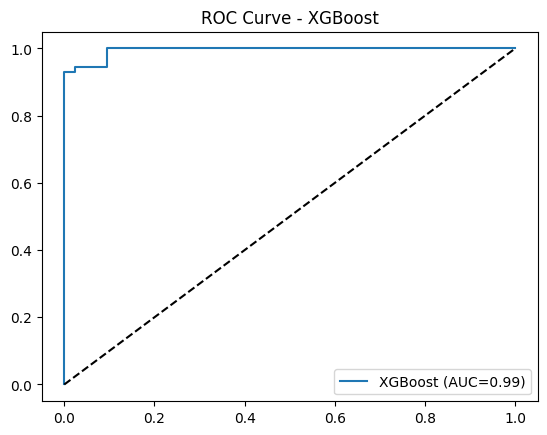

Best RF Params: {'criterion': 'entropy', 'max_depth': None, 'n_estimators': 50}
Random Forest -> Accuracy: 0.9561, F1 Score: 0.9655
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



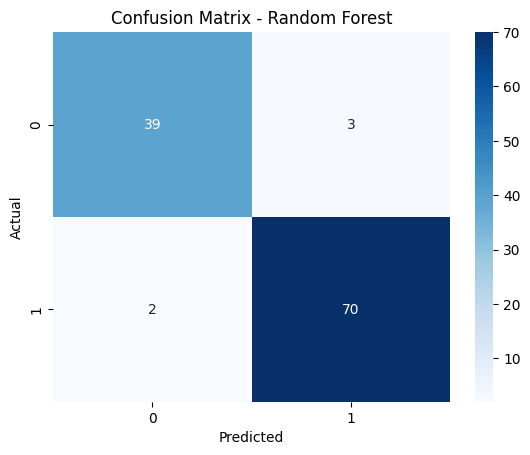

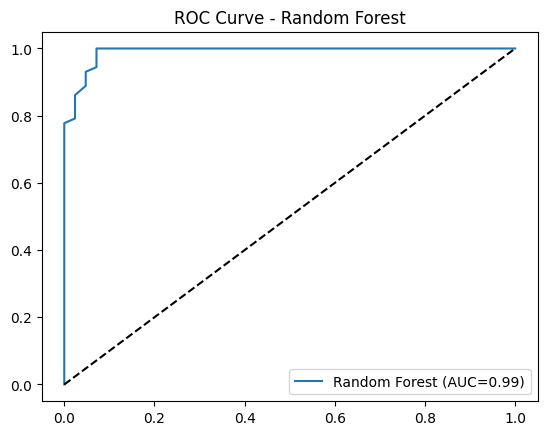

Stacked Ensemble -> Accuracy: 0.9737, F1 Score: 0.9793
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        42
           1       0.97      0.99      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



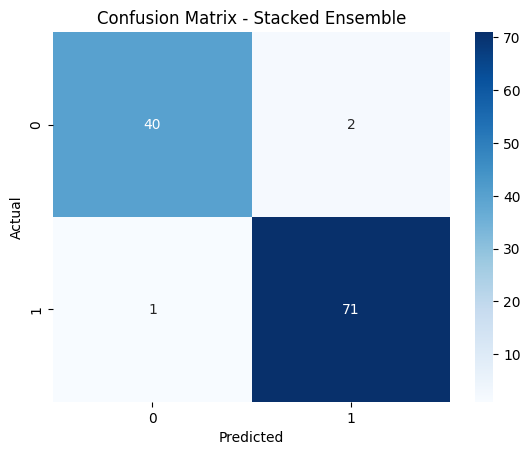

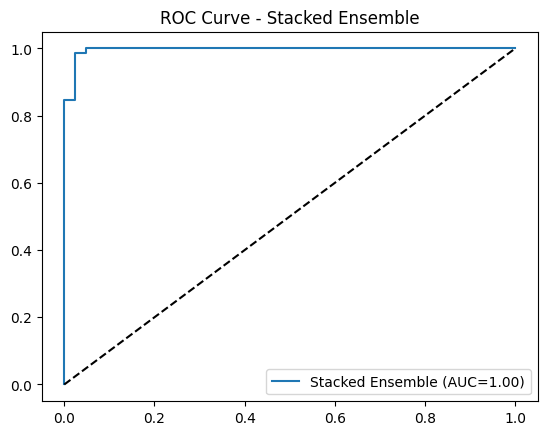


5-Fold CV Results:
    Decision Tree  AdaBoost  Gradient Boosting   XGBoost  Random Forest  \
0       0.929825  0.982456           0.912281  0.956140       0.938596   
1       0.921053  0.964912           0.929825  0.947368       0.956140   
2       0.947368  0.991228           0.982456  0.991228       0.991228   
3       0.938596  0.964912           0.973684  0.982456       0.982456   
4       0.946903  0.982301           0.955752  0.964602       0.964602   

    Stacked  
0  0.947368  
1  0.947368  
2  0.956140  
3  0.973684  
4  0.973451   

Average Accuracies:
 Decision Tree        0.936749
AdaBoost             0.977162
Gradient Boosting    0.950800
XGBoost              0.968359
Random Forest        0.966605
Stacked              0.959603
dtype: float64


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_curve, auc

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

# -------------------------------
# Load and preprocess dataset
# -------------------------------
data = load_breast_cancer()
X, y = data.data, data.target

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Helper function to evaluate model
def evaluate_model(model, X_test, y_test, name="Model"):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"{name} -> Accuracy: {acc:.4f}, F1 Score: {f1:.4f}")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC Curve
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc(fpr,tpr):.2f})")
    plt.plot([0, 1], [0, 1], "k--")
    plt.legend()
    plt.title(f"ROC Curve - {name}")
    plt.show()
    return acc, f1

# -------------------------------
# Decision Tree
# -------------------------------
dt_params = {"criterion": ["gini", "entropy"], "max_depth": [3, 5, 7, None]}
dt = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5)
dt.fit(X_train, y_train)
print("Best DT Params:", dt.best_params_)
dt_acc, dt_f1 = evaluate_model(dt.best_estimator_, X_test, y_test, "Decision Tree")

# -------------------------------
# AdaBoost
# -------------------------------
ada_params = {"n_estimators": [50, 100], "learning_rate": [0.01, 0.1, 1]}
ada = GridSearchCV(AdaBoostClassifier(random_state=42), ada_params, cv=5)
ada.fit(X_train, y_train)
print("Best Ada Params:", ada.best_params_)
ada_acc, ada_f1 = evaluate_model(ada.best_estimator_, X_test, y_test, "AdaBoost")

# -------------------------------
# Gradient Boosting
# -------------------------------
gb_params = {"n_estimators": [50, 100], "learning_rate": [0.01, 0.1, 0.5], "max_depth": [3, 5]}
gb = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_params, cv=5)
gb.fit(X_train, y_train)
print("Best GB Params:", gb.best_params_)
gb_acc, gb_f1 = evaluate_model(gb.best_estimator_, X_test, y_test, "Gradient Boosting")

# -------------------------------
# XGBoost
# -------------------------------
xgb_params = {"n_estimators": [50, 100], "learning_rate": [0.01, 0.1], "max_depth": [3, 5], "gamma": [0, 1]}
xgb_clf = GridSearchCV(
    xgb.XGBClassifier(
        objective="binary:logistic",
        eval_metric="logloss",
        random_state=42
    ),
    xgb_params,
    cv=5
)
xgb_clf.fit(X_train, y_train)
print("Best XGB Params:", xgb_clf.best_params_)
xgb_acc, xgb_f1 = evaluate_model(xgb_clf.best_estimator_, X_test, y_test, "XGBoost")

# -------------------------------
# Random Forest
# -------------------------------
rf_params = {"n_estimators": [50, 100], "max_depth": [3, 5, None], "criterion": ["gini", "entropy"]}
rf = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5)
rf.fit(X_train, y_train)
print("Best RF Params:", rf.best_params_)
rf_acc, rf_f1 = evaluate_model(rf.best_estimator_, X_test, y_test, "Random Forest")

# -------------------------------
# Stacked Model
# -------------------------------
estimators = [
    ("svm", SVC(probability=True, kernel="linear")),
    ("nb", GaussianNB()),
    ("dt", DecisionTreeClassifier(max_depth=3))
]
stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stack.fit(X_train, y_train)
stack_acc, stack_f1 = evaluate_model(stack, X_test, y_test, "Stacked Ensemble")

# -------------------------------
# Cross-Validation Comparison
# -------------------------------
models = {
    "Decision Tree": dt.best_estimator_,
    "AdaBoost": ada.best_estimator_,
    "Gradient Boosting": gb.best_estimator_,
    "XGBoost": xgb_clf.best_estimator_,
    "Random Forest": rf.best_estimator_,
    "Stacked": stack
}

cv_results = {}
for name, m in models.items():
    scores = cross_val_score(m, X, y, cv=5, scoring="accuracy")
    cv_results[name] = scores

cv_df = pd.DataFrame(cv_results)
print("\n5-Fold CV Results:\n", cv_df, "\n")
print("Average Accuracies:\n", cv_df.mean())
